In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
ship= pd.read_csv("titanic/train.csv")


In [ ]:
#total family members present with passsenger
df = ship
df["total_family"] = df["SibSp"] + df["Parch"] 

df.head()


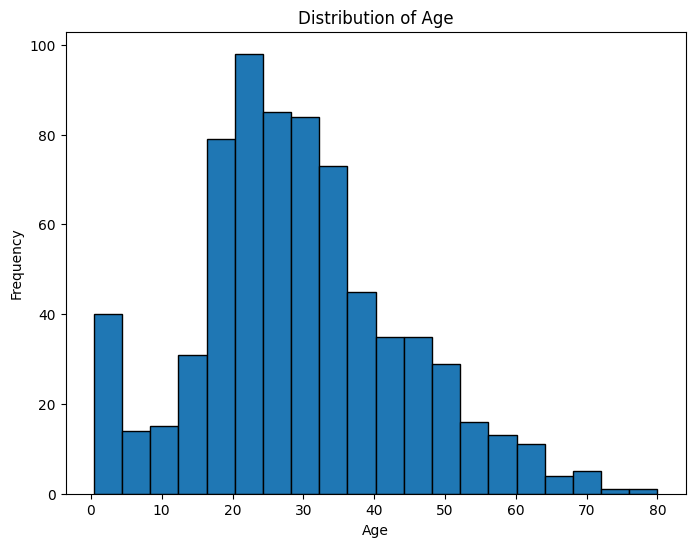

In [264]:

age_data = df['Age']

# Plotting the distribution of Age
plt.figure(figsize=(8, 6))
plt.hist(age_data, bins=20 , edgecolor = 'black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## filling for age column what 

In [375]:
master_names = df[df['Name'].str.contains('Master')]

#number of children
no_of_children = len(master_names)

# Extract 'Age' values for these rows
master_ages = master_names['Age']

mean_master_ages = round(master_ages.mean(),2)
print(mean_master_ages)

master_names.loc[: , 'Age'] = master_names['Age'].fillna(mean_master_ages)


4.57


In [376]:
men_names = df[(df['Name'].str.contains(r'Mr', regex=True)) & (df['Sex'] == 'male') ]

#number of men
no_of_male = len(men_names)

# Extract 'Age' values for these rows
male_ages = men_names['Age']

mean_male_ages = round(male_ages.mean(),2)
print(mean_male_ages)

men_names.loc[: , 'Age'] = men_names['Age'].fillna(mean_male_ages)

32.41


In [267]:
women_names = df[(df['Name'].str.contains(r'Mrs.', regex=True)) ]

#number of men
no_of_female = len(women_names)

# Extract 'Age' values for these rows
female_ages = women_names['Age']

mean_female_ages = round(female_ages.mean(),2)
print(mean_female_ages)

women_names.loc[: , 'Age'] = women_names['Age'].fillna(mean_female_ages)

miss_names = df[(df['Name'].str.contains(r'Miss.', regex=True)) ]
mean_miss_ages = round(miss_names['Age'].mean(),2)

print(mean_miss_ages)


35.64
21.77


In [ ]:
df.loc[(df['Sex'] == 'male') & (df['Age'].isnull() & (df['Name'].str.contains(r'Mr', regex=True))), 'Age'] = mean_male_ages
df.loc[(df['Sex'] == 'female') & (df['Age'].isnull() & (df['Name'].str.contains(r'Mrs', regex=True))), 'Age'] = mean_female_ages
df.loc[(df['Age'].isnull() & (df['Name'].str.contains(r'Master'))), 'Age'] = mean_master_ages
df.loc[(df['Age'].isnull() & (df['Name'].str.contains(r'Miss'))), 'Age'] = mean_miss_ages

df['Fare'].fillna(df['Fare'].median(), inplace = True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

now that age data is filled lets make a scatter plot
to see if age survives or not


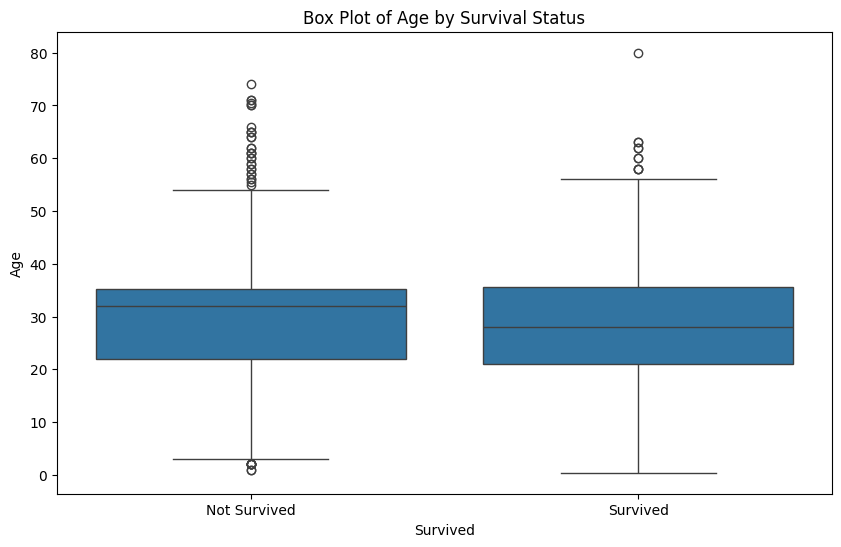

In [269]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)

plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Box Plot of Age by Survival Status')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show();


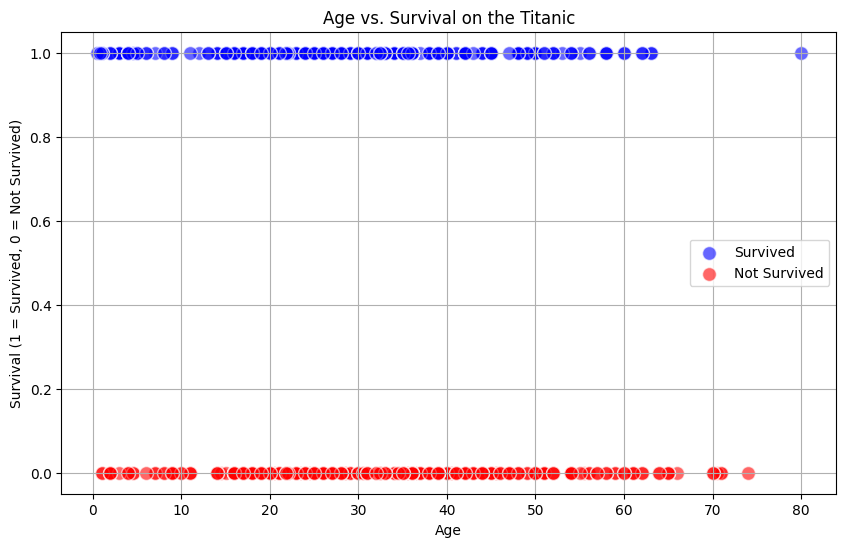

In [270]:
# Prepare the data for plotting
survived = df[df['Survived'] == 1]
not_survived = df[df['Survived'] == 0]

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot survived passengers
plt.scatter(survived['Age'], survived['Survived'], c='blue', label='Survived', alpha=0.6, edgecolors='w', s=100)

# Plot not survived passengers
plt.scatter(not_survived['Age'], not_survived['Survived'], c='red', label='Not Survived', alpha=0.6, edgecolors='w', s=100)

# Add titles and labels
plt.title('Age vs. Survival on the Titanic')
plt.xlabel('Age')
plt.ylabel('Survival (1 = Survived, 0 = Not Survived)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show();


there are aa few outliers as we can see

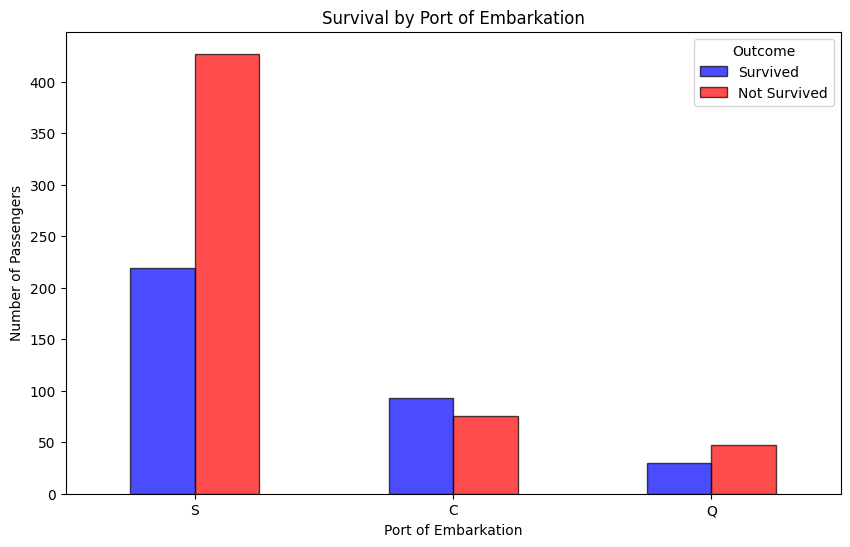

In [271]:
# Prepare the data for plotting
embarked_survived = df[df['Survived'] == 1]['Embarked'].value_counts()
embarked_not_survived = df[df['Survived'] == 0]['Embarked'].value_counts()

# Create a DataFrame with counts
embarked_counts = pd.DataFrame({'Survived': embarked_survived, 'Not Survived': embarked_not_survived}).fillna(0)

# Plot the data
ax = embarked_counts.plot(kind='bar', figsize=(10, 6), color=['blue', 'red'], alpha=0.7, edgecolor='black')

# Add titles and labels
plt.title('Survival by Port of Embarkation')
plt.xlabel('Port of Embarkation')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Outcome')

# Show the plot
plt.show();


higher ratio of people died in S then C then Q, you have the best chances if you 'embarked' from Q

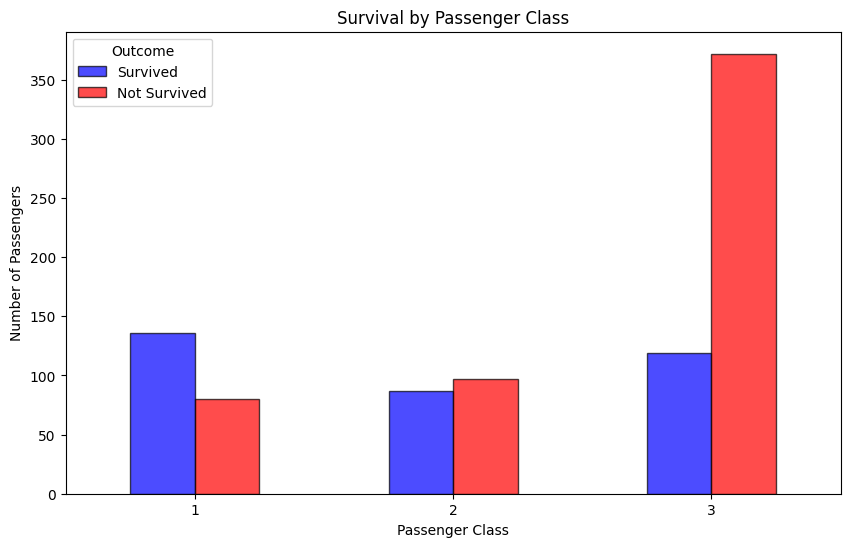

In [272]:
# Prepare the data for plotting
pclass_survived = df[df['Survived'] == 1]['Pclass'].value_counts().sort_index()
pclass_not_survived = df[df['Survived'] == 0]['Pclass'].value_counts().sort_index()

# Create a DataFrame with counts
pclass_counts = pd.DataFrame({'Survived': pclass_survived, 'Not Survived': pclass_not_survived}).fillna(0)

# Plot the data
ax = pclass_counts.plot(kind='bar', figsize=(10, 6), color=['blue', 'red'], alpha=0.7, edgecolor='black')

# Add titles and labels
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Outcome')

# Show the plot
plt.show();


as expected more number of people from class 2 and 3 died 

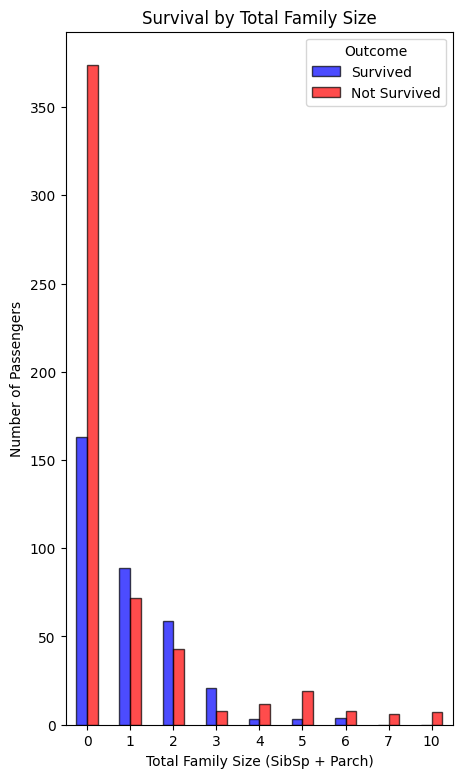

In [273]:
# Prepare the data for plotting
total_family_survived = df[df['Survived'] == 1]['total_family'].value_counts().sort_index()
total_family_not_survived = df[df['Survived'] == 0]['total_family'].value_counts().sort_index()

# Create a DataFrame with counts
total_family_counts = pd.DataFrame({'Survived': total_family_survived, 'Not Survived': total_family_not_survived}).fillna(0)

# Plot the data
ax = total_family_counts.plot(kind='bar', figsize=(5,9), color=['blue', 'red'], alpha=0.7, edgecolor='black')

# Add titles and labels
plt.title('Survival by Total Family Size')
plt.xlabel('Total Family Size (SibSp + Parch)')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=0)
plt.legend(title='Outcome')

# Show the plot
plt.show();



we can see an interesting pattern as soon as you have 1 family member you have better chances of survival


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20684\3308114248.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival_counts = df.groupby(['FareRange', 'Survived']).size().unstack(fill_value=0)


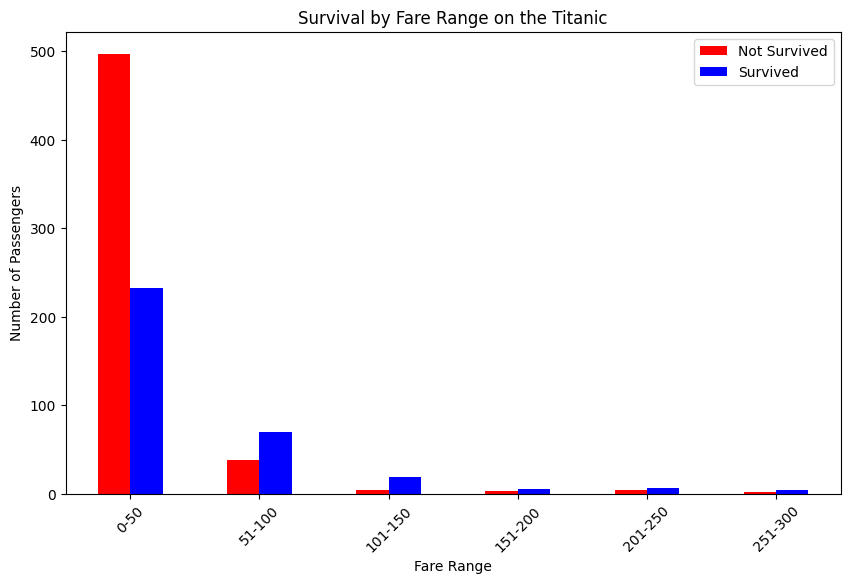

In [274]:
# Define fare ranges

# Define fare ranges
fare_bins = [0, 50, 100, 150, 200, 250, 300]
fare_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300']


# fare_bins = [50, 100, 150, 200, 250]
# fare_labels = ['51-100', '101-150', '151-200', '201-250']

# Add a new column 'FareRange' to the DataFrame
df['FareRange'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)

# Calculate the number of survivors and non-survivors in each fare range
fare_survival_counts = df.groupby(['FareRange', 'Survived']).size().unstack(fill_value=0)

# Plot the data
fare_survival_counts.plot(kind='bar', color=['red', 'blue'], figsize=(10, 6))

# Add titles and labels
plt.title('Survival by Fare Range on the Titanic')
plt.xlabel('Fare Range')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.legend(['Not Survived', 'Survived'])

# Show the plot
plt.show();



we can see how ratio of deaths is significantly higher for the lower tickets


C:\Users\KIIT\AppData\Local\Temp\ipykernel_20684\1921688043.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival_counts = df.groupby(['FareRange', 'Survived']).size().unstack(fill_value=0)


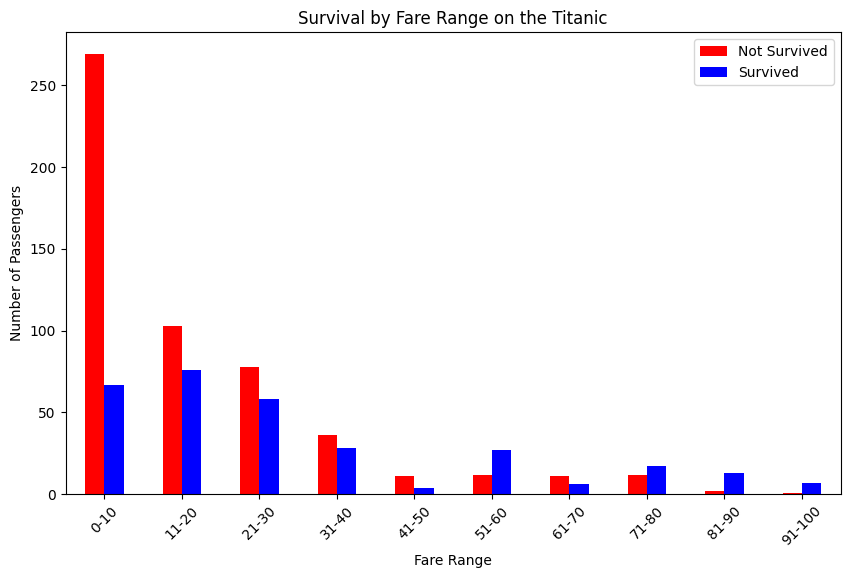

In [275]:
# Calculate the number of survivors and non-survivors in each fare range
# Define smaller fare ranges
fare_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
fare_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']

# Add a new column 'FareRange' to the DataFrame
df['FareRange'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)

fare_survival_counts = df.groupby(['FareRange', 'Survived']).size().unstack(fill_value=0)
# Plot the data
fare_survival_counts.plot(kind='bar', color=['red', 'blue'], figsize=(10, 6))

# Add titles and labels
plt.title('Survival by Fare Range on the Titanic')
plt.xlabel('Fare Range')
plt.ylabel('Number of Passengers')
plt.xticks(rotation=45)
plt.legend(['Not Survived', 'Survived'])

# Show the plot
plt.show();


In [276]:
fare_bins = [0, 100, 150, 200, 250, 300, 350, 400, 450, 500]
fare_labels = [ '0-100' ,'101-150', '151-200', '201-250', '251-300','301-350', '351-400', '401-450', '451-500']

# Add a new column 'FareRange' to the DataFrame
df['FareRange'] = pd.cut(df['Fare'], bins=fare_bins, labels=fare_labels, right=False)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,total_family,FareRange
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,1,0-100
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,1,0-100
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0-100
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,1,0-100
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,0,0-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00,0,0,211536,13.0000,NaN,S,0,0-100
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00,0,0,112053,30.0000,B42,S,0,0-100
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.77,1,2,W./C. 6607,23.4500,NaN,S,3,0-100
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00,0,0,111369,30.0000,C148,C,0,0-100


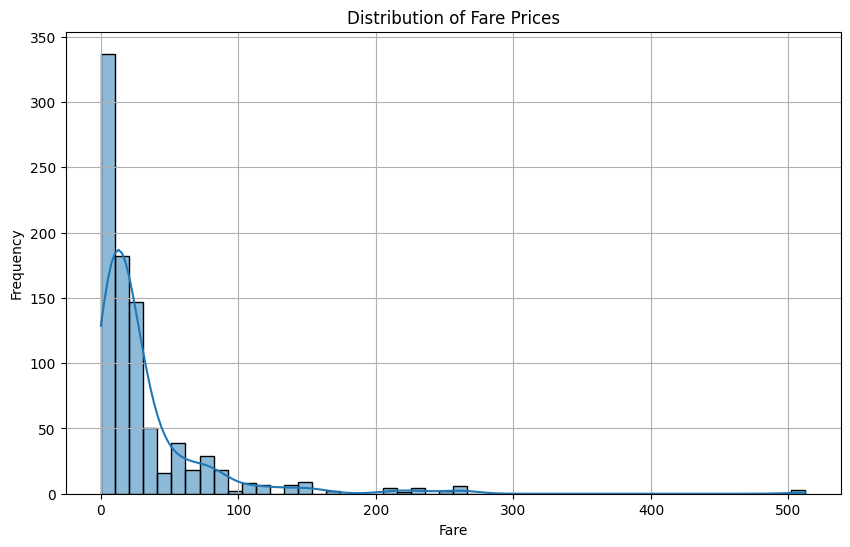

In [277]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=50, kde=True)
plt.title('Distribution of Fare Prices')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [278]:
# Convert categorical variables to numerical format
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

df = pd.get_dummies(df, columns=['Embarked'])

df = pd.get_dummies(df, columns = ['FareRange'])



In [279]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'total_family', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'FareRange_0-100', 'FareRange_101-150',
       'FareRange_151-200', 'FareRange_201-250', 'FareRange_251-300',
       'FareRange_301-350', 'FareRange_351-400', 'FareRange_401-450',
       'FareRange_451-500'],
      dtype='object')

In [280]:
kk

NameError: name 'kk' is not defined

In [359]:
test = df

In [360]:
test.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'total_family', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'FareRange_0-100', 'FareRange_101-150',
       'FareRange_151-200', 'FareRange_201-250', 'FareRange_251-300',
       'FareRange_301-350', 'FareRange_351-400', 'FareRange_401-450',
       'FareRange_451-500', 'Age_bin', 'target'],
      dtype='object')

In [361]:
fare_stats = df['Fare'].describe()
fare_stats

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [362]:
test['Age'] =test['Age'].fillna(test['Age'].median())

test['Age_bin'] = pd.cut(test['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])

test = pd.get_dummies(test, columns = ['Age_bin'])

test['Fare_bin'] = pd.cut(test['Fare'], bins=[0,7.91,14.45,31,512], labels=['Low_fare','median_fare','Average_fare','high_fare'])

test =  pd.get_dummies(test,columns = ['Fare_bin'])


In [363]:
test['target'] = test['Survived']

test.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'total_family', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'FareRange_0-100', 'FareRange_101-150',
       'FareRange_151-200', 'FareRange_201-250', 'FareRange_251-300',
       'FareRange_301-350', 'FareRange_351-400', 'FareRange_401-450',
       'FareRange_451-500', 'target', 'Age_bin_Children', 'Age_bin_Teenage',
       'Age_bin_Adult', 'Age_bin_Elder', 'Fare_bin_Low_fare',
       'Fare_bin_median_fare', 'Fare_bin_Average_fare', 'Fare_bin_high_fare'],
      dtype='object')

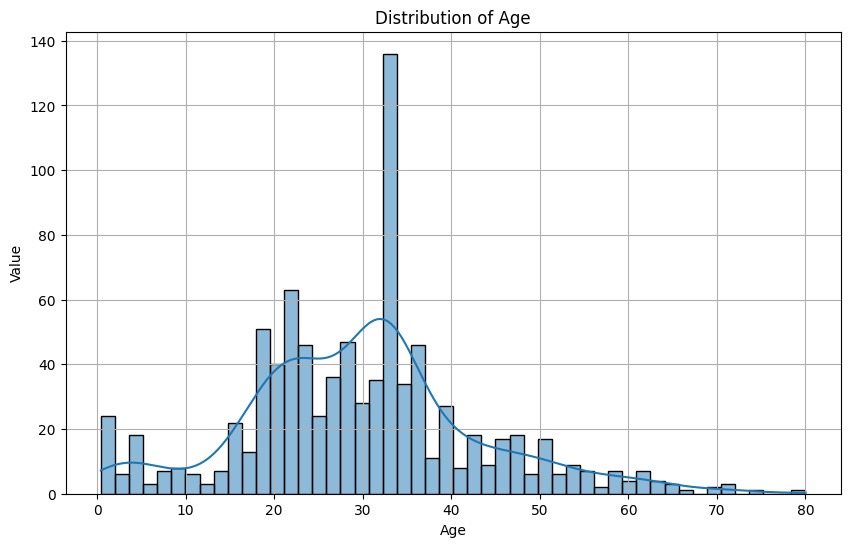

In [364]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=50, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [365]:
test = test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch','Fare','Survived','Age','FareRange_151-200', 'FareRange_201-250', 'FareRange_251-300',
                          'FareRange_301-350', 'FareRange_351-400', 'FareRange_401-450', 'FareRange_451-500',])

test.columns



Index(['Pclass', 'total_family', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'FareRange_0-100', 'FareRange_101-150', 'target',
       'Age_bin_Children', 'Age_bin_Teenage', 'Age_bin_Adult', 'Age_bin_Elder',
       'Fare_bin_Low_fare', 'Fare_bin_median_fare', 'Fare_bin_Average_fare',
       'Fare_bin_high_fare'],
      dtype='object')

In [366]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define features and target variable
X = test[['Pclass', 'total_family', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'FareRange_0-100', 'FareRange_101-150',
       'Age_bin_Children', 'Age_bin_Teenage', 'Age_bin_Adult', 'Age_bin_Elder',
       'Fare_bin_Low_fare', 'Fare_bin_median_fare', 'Fare_bin_Average_fare',
       'Fare_bin_high_fare']]
y = test['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(criterion='log_loss',random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)




Accuracy: 0.8426395939086294


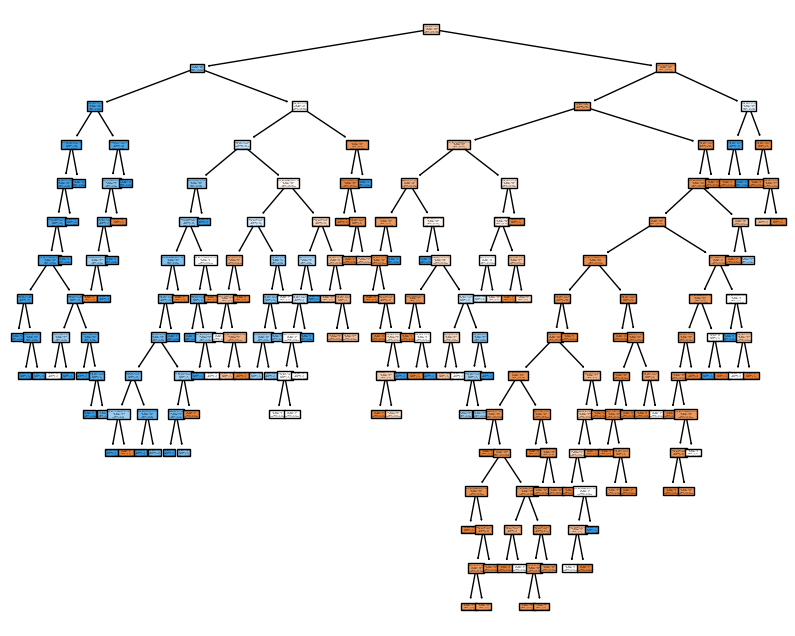

In [367]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(10,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()


In [368]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier

X = test[['Pclass', 'total_family', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'FareRange_0-100', 'FareRange_101-150',
       'Age_bin_Children', 'Age_bin_Teenage', 'Age_bin_Adult', 'Age_bin_Elder',
       'Fare_bin_Low_fare', 'Fare_bin_median_fare', 'Fare_bin_Average_fare',
       'Fare_bin_high_fare']]
y = test['target']

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(criterion= "log_loss" , random_state=42,)

# Initialize StratifiedKFold for cross-validation
# StratifiedKFold ensures that each fold has the same proportion of target classes as the entire dataset
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# For classification tasks, 'accuracy' is a commonly used metric
scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", scores)

# Print mean and standard deviation of cross-validation scores
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())


Cross-Validation Scores: [0.83333333 0.80898876 0.80898876 0.80898876 0.79775281 0.82022472
 0.88764045 0.7752809  0.8988764  0.84269663]
Mean Accuracy: 0.8282771535580524
Standard Deviation of Accuracy: 0.036963559886732535


# Random forest classifier

In [369]:
print(test.isnull().sum())

Pclass                   0
total_family             0
Sex_male                 0
Embarked_C               0
Embarked_Q               0
Embarked_S               0
FareRange_0-100          0
FareRange_101-150        0
target                   0
Age_bin_Children         0
Age_bin_Teenage          0
Age_bin_Adult            0
Age_bin_Elder            0
Fare_bin_Low_fare        0
Fare_bin_median_fare     0
Fare_bin_Average_fare    0
Fare_bin_high_fare       0
dtype: int64


In [370]:
test

,Pclass,total_family,Sex_male,Embarked_C,Embarked_Q,Embarked_S,FareRange_0-100,FareRange_101-150,target,Age_bin_Children,Age_bin_Teenage,Age_bin_Adult,Age_bin_Elder,Fare_bin_Low_fare,Fare_bin_median_fare,Fare_bin_Average_fare,Fare_bin_high_fare
0,3,1,True,False,False,True,True,False,0,False,False,True,False,True,False,False,False
1,1,1,False,True,False,False,True,False,1,False,False,True,False,False,False,False,True
2,3,0,False,False,False,True,True,False,1,False,False,True,False,False,True,False,False
3,1,1,False,False,False,True,True,False,1,False,False,True,False,False,False,False,True
4,3,0,True,False,False,True,True,False,0,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,True,False,False,True,True,False,0,False,False,True,False,False,True,False,False
887,1,0,False,False,False,True,True,False,1,False,True,False,False,False,False,True,False
888,3,3,False,False,False,True,True,False,0,False,False,True,False,False,False,True,False
889,1,0,True,True,False,False,True,False,1,False,False,True,False,False,False,True,False


In [371]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100,criterion="gini" , random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8547486033519553


In [372]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# For classification tasks, 'accuracy' is a commonly used metric
scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", scores)

# Print mean and standard deviation of cross-validation scores
print("Mean Accuracy:", scores.mean())
print("Standard Deviation of Accuracy:", scores.std())

Cross-Validation Scores: [0.85555556 0.82022472 0.82022472 0.85393258 0.78651685 0.84269663
 0.88764045 0.78651685 0.86516854 0.84269663]
Mean Accuracy: 0.8361173533083643
Standard Deviation of Accuracy: 0.031154408144352448
